In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import fftpack

%matplotlib inline

In [26]:
N = 512
dt = 0.01
f = 10
t = np.linspace(1, N, N) * dt - dt
y = np.sin(2 * np.pi * f * t)

In [29]:
yf = fftpack.fft(y)

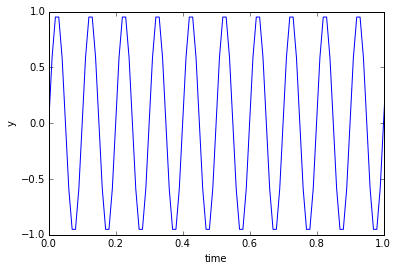

In [30]:
plt.figure(1)
plt.plot(t, y)
plt.xlim(0, 1)
plt.xlabel("time")
plt.ylabel("y")
plt.show()

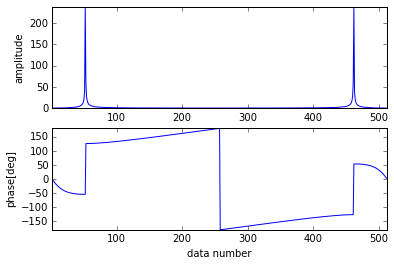

In [31]:
# 大きさ、位相
plt.figure(2)
plt.subplot(211)
plt.plot(np.linspace(1, N, N), np.abs(yf))
plt.axis('tight')
plt.ylabel("amplitude")
plt.subplot(212)
plt.plot(np.linspace(1, N, N), np.degrees(np.angle(yf)))
plt.axis('tight')
plt.xlabel("data number")
plt.ylabel("phase[deg]")
plt.show()

In [37]:
y2 = np.real(fftpack.ifft(yf))

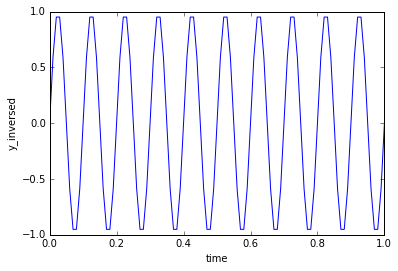

In [38]:
plt.figure(3)
plt.plot(t, y2)
plt.xlim(0, 1)
plt.xlabel("time")
plt.ylabel("y_inversed")
plt.show()